<a href="https://colab.research.google.com/github/hifsakazmi/computer-vision-in-python/blob/main/Headwear_Detection_through_Yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Headwear Detection using YOLO Pre-trained Model

## Project Description

* The goal of this project is to use a pre-trained YOLO model to detect different types of headwears (hats, crowns, hijabs, turbans, dupatta, keffiyeh, caps, beanies) in a dataset I created by scraping images.
* The images in the dataset were annotated and resized using Roboflow. I annotated two classes in the images: **face** and **headwear**.
* The dataset has **330 images**. Out of these, more than 50% of images have a person(s) wearing some sort of headwear.

## Download Dataset from Roboflow

In [1]:
# created HOME variable for current working directory
import os
HOME = os.getcwd()
print(HOME)

/content


### Installing required libraries

In [2]:
%pip install ultralytics supervision roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 911.6/911.6 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 181.5/181.5 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.3 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


### Loading dataset

From Roboflow, datasets can be downloaded as a zip file or through python code using ROBOFLOW_API_KEY. Here I have downloaded dataset through the snippet below instead of downloading it as a zip file.

In [3]:
from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('roboflow')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)

# Downloading my dataset from roboflow
project = rf.workspace("sandbox-u3gno").project("headwear-detection")
version = project.version(2)
dataset = version.download("yolov11")


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to headwear-detection-2 in yolov11:: 100%|██████████| 672/672 [00:00<00:00, 2032.44it/s]


In [4]:
print(dataset.location)

/content/headwear-detection-2


## Training the Pre-trained YOLOv11 Model

Performing checks to make sure ultralytics is correctly installed.

In [5]:
import ultralytics

ultralytics.checks()

Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.8/112.6 GB disk)


### Loading the model and training
* Here I loaded **yolo11s.pt** pre-trained model which is the small variant of YOLOv11. I also tried **yolo11m.pt** (medium) and **yolo11l.pt** (large).Out all these models large variant performed the worst on this dataset.
* The pre-trained model is trained on my dataset for 10 epochs.

In [16]:
from ultralytics import YOLO

# Load a pretrained YOLO model x variant
model = YOLO('yolo11s.pt')

# Train the model
results = model.train(data=f"{dataset.location}/data.yaml",
                      epochs=10,
                      imgsz=640,
                      plots=True)

100%|██████████| 18.4M/18.4M [00:00<00:00, 128MB/s] 


Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/headwear-detection-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=Tru

100%|██████████| 5.35M/5.35M [00:00<00:00, 92.0MB/s]


AMP: checks passed ✅


train: Scanning /content/headwear-detection-2/train/labels.cache... 231 images, 1 backgrounds, 0 corrupt: 100%|██████████| 231/231 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/headwear-detection-2/valid/labels.cache... 66 images, 1 backgrounds, 0 corrupt: 100%|██████████| 66/66 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.89G      2.067      6.707      2.185         20        640: 100%|██████████| 15/15 [00:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.71it/s]

                   all         66        170      0.383      0.313      0.319      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      4.42G      1.609      2.996      1.667         23        640: 100%|██████████| 15/15 [00:05<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.12it/s]

                   all         66        170      0.611       0.45      0.485      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.42G      1.612      2.101      1.567         29        640: 100%|██████████| 15/15 [00:04<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         66        170      0.131      0.449       0.11     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10       4.4G      1.562      1.628       1.59         14        640: 100%|██████████| 15/15 [00:06<00:00,  2.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         66        170      0.549      0.593      0.548      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       4.4G      1.548      1.397      1.578         21        640: 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.38it/s]

                   all         66        170      0.374      0.559       0.43      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       4.4G      1.573      1.257      1.564         11        640: 100%|██████████| 15/15 [00:04<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.06it/s]

                   all         66        170       0.45      0.734      0.541       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.42G      1.515      1.199      1.547         13        640: 100%|██████████| 15/15 [00:05<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.44it/s]

                   all         66        170        0.6      0.683      0.622      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      4.42G      1.428      1.072      1.443         17        640: 100%|██████████| 15/15 [00:04<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         66        170      0.743      0.729       0.76      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      4.42G      1.449     0.9969      1.436         12        640: 100%|██████████| 15/15 [00:05<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.75it/s]

                   all         66        170      0.753      0.734      0.745      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.42G      1.354       0.91      1.395         12        640: 100%|██████████| 15/15 [00:04<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.74it/s]

                   all         66        170      0.755      0.797      0.808      0.458



10 epochs completed in 0.022 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 19.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 19.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.65 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11s summary (fused): 238 layers, 9,413,574 parameters, 0 gradients, 21.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]


                   all         66        170      0.755      0.797      0.808       0.46
                  face         65        106      0.881      0.953       0.98      0.559
              headwear         40         64       0.63      0.641      0.635      0.361
Speed: 0.2ms preprocess, 5.2ms inference, 0.0ms loss, 2.2ms postprocess per image
Results saved to runs/detect/train


## Evaluation

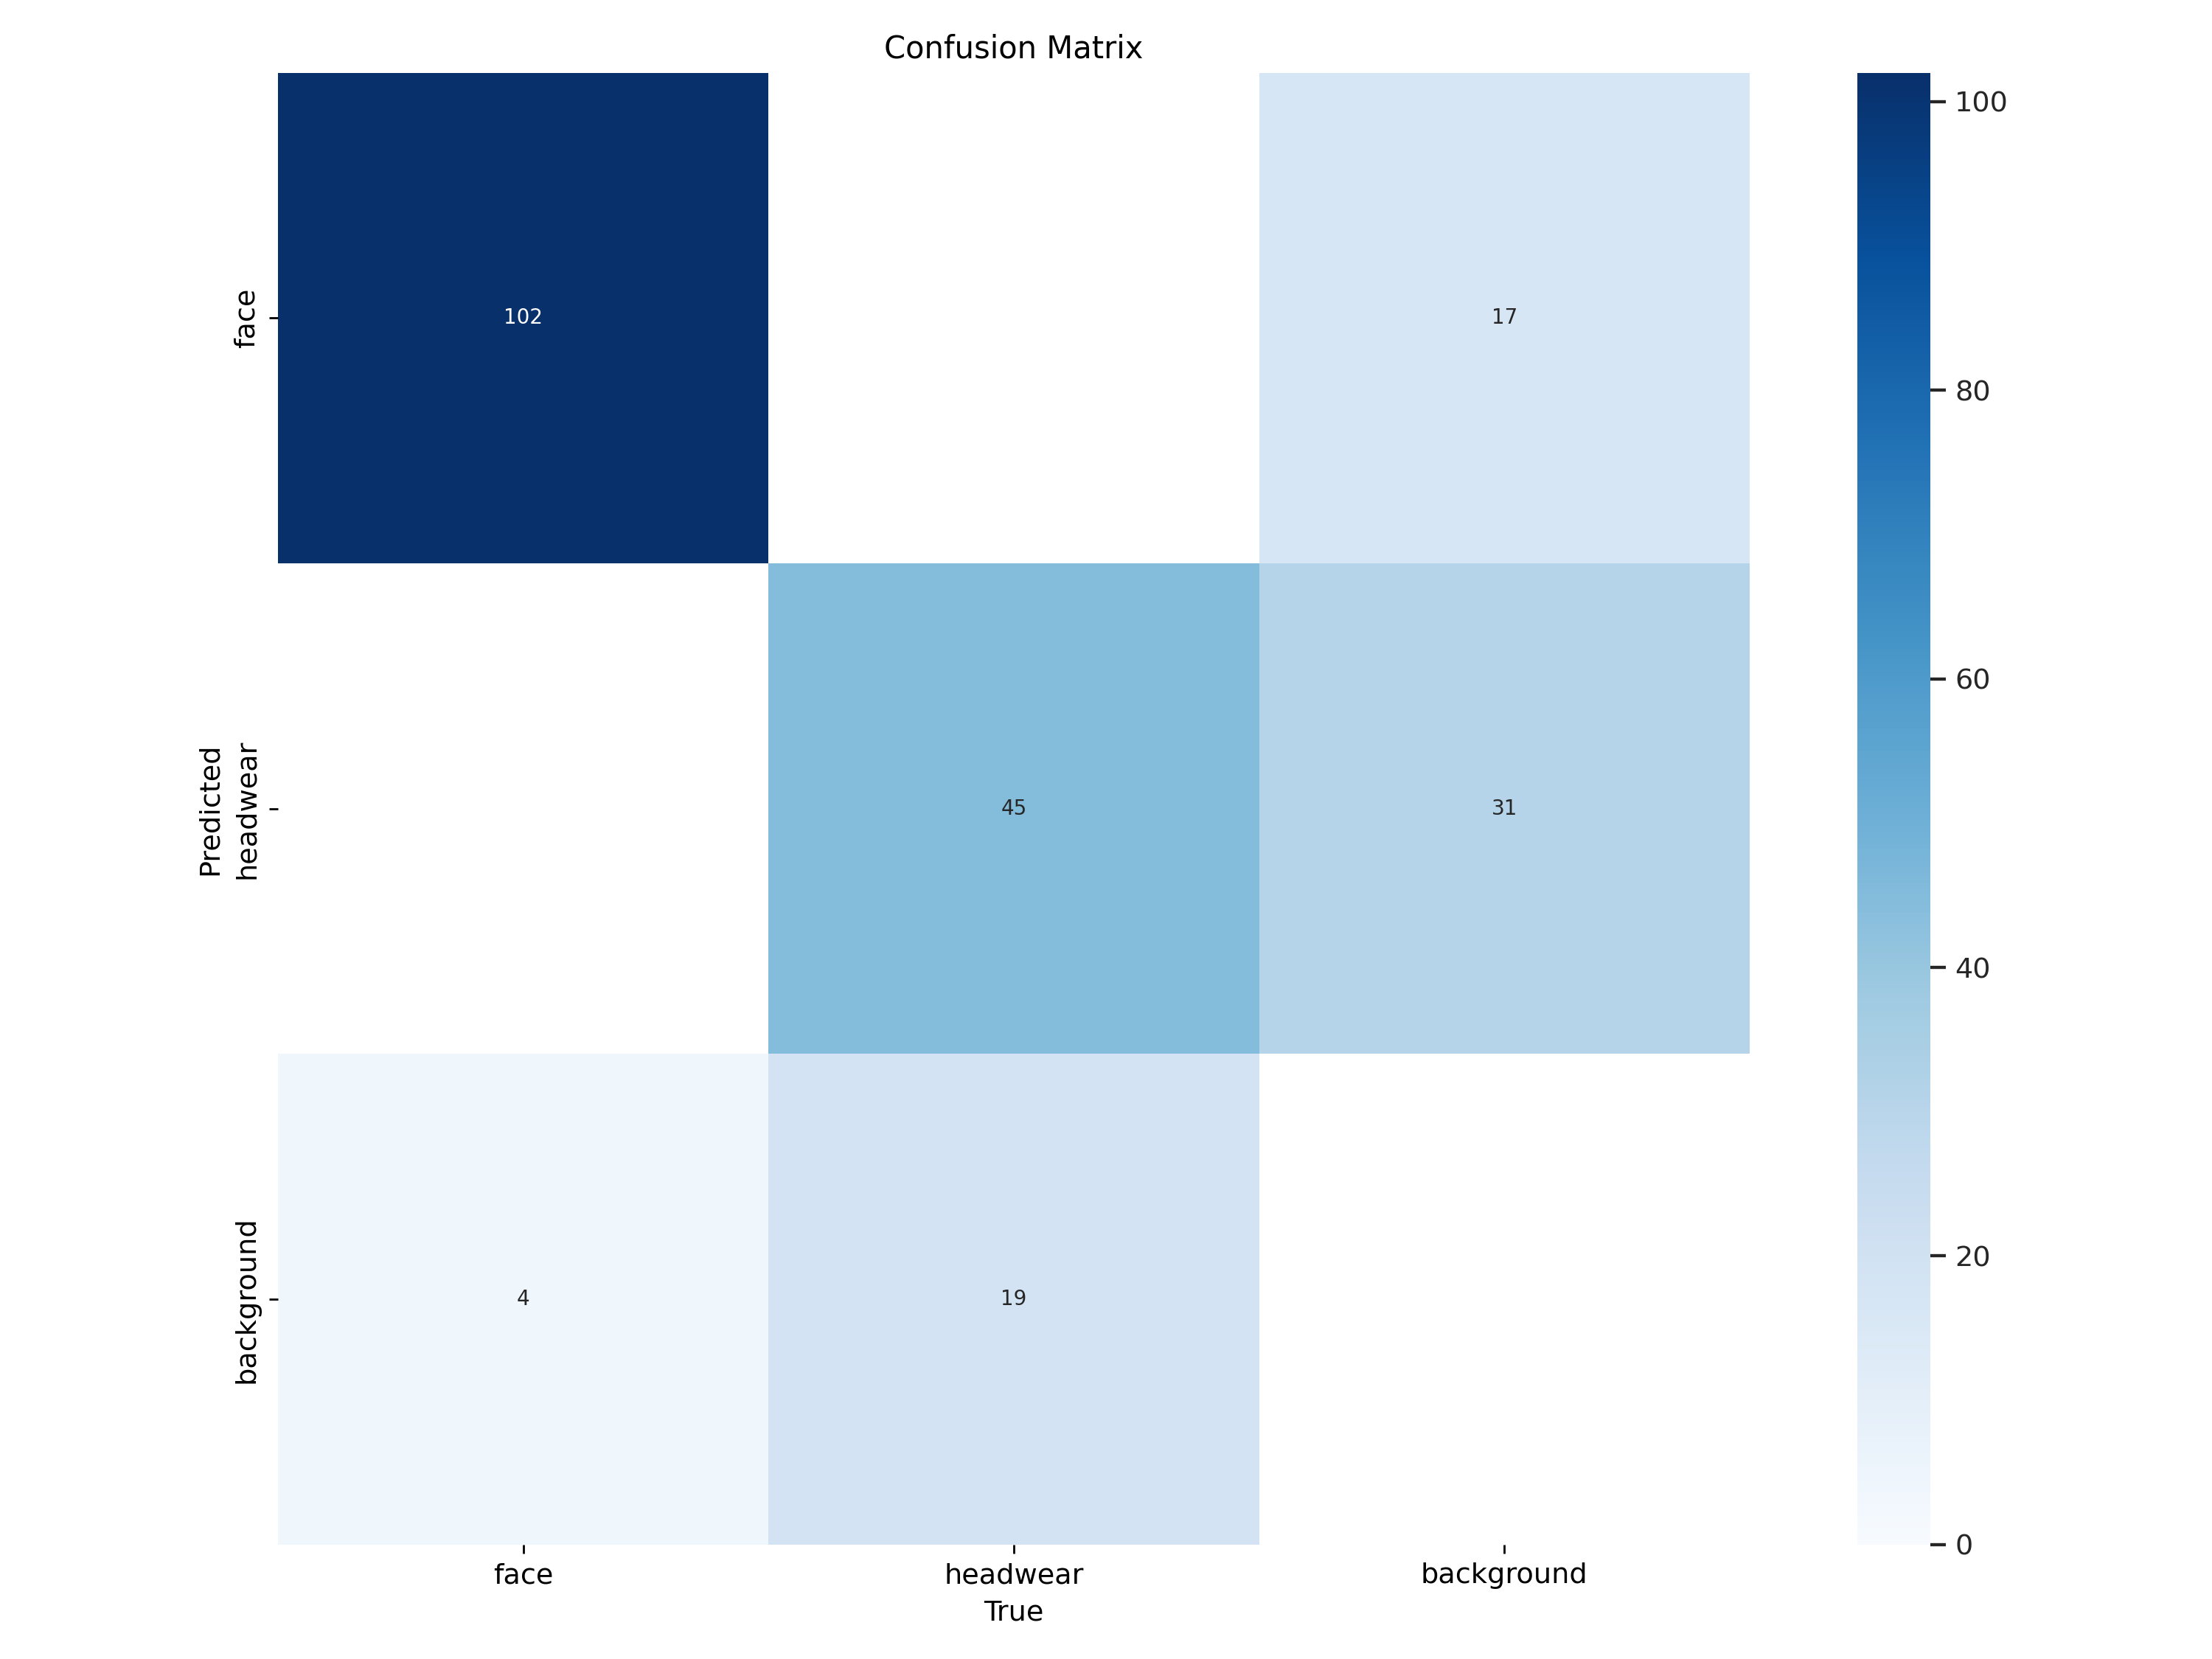

In [17]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

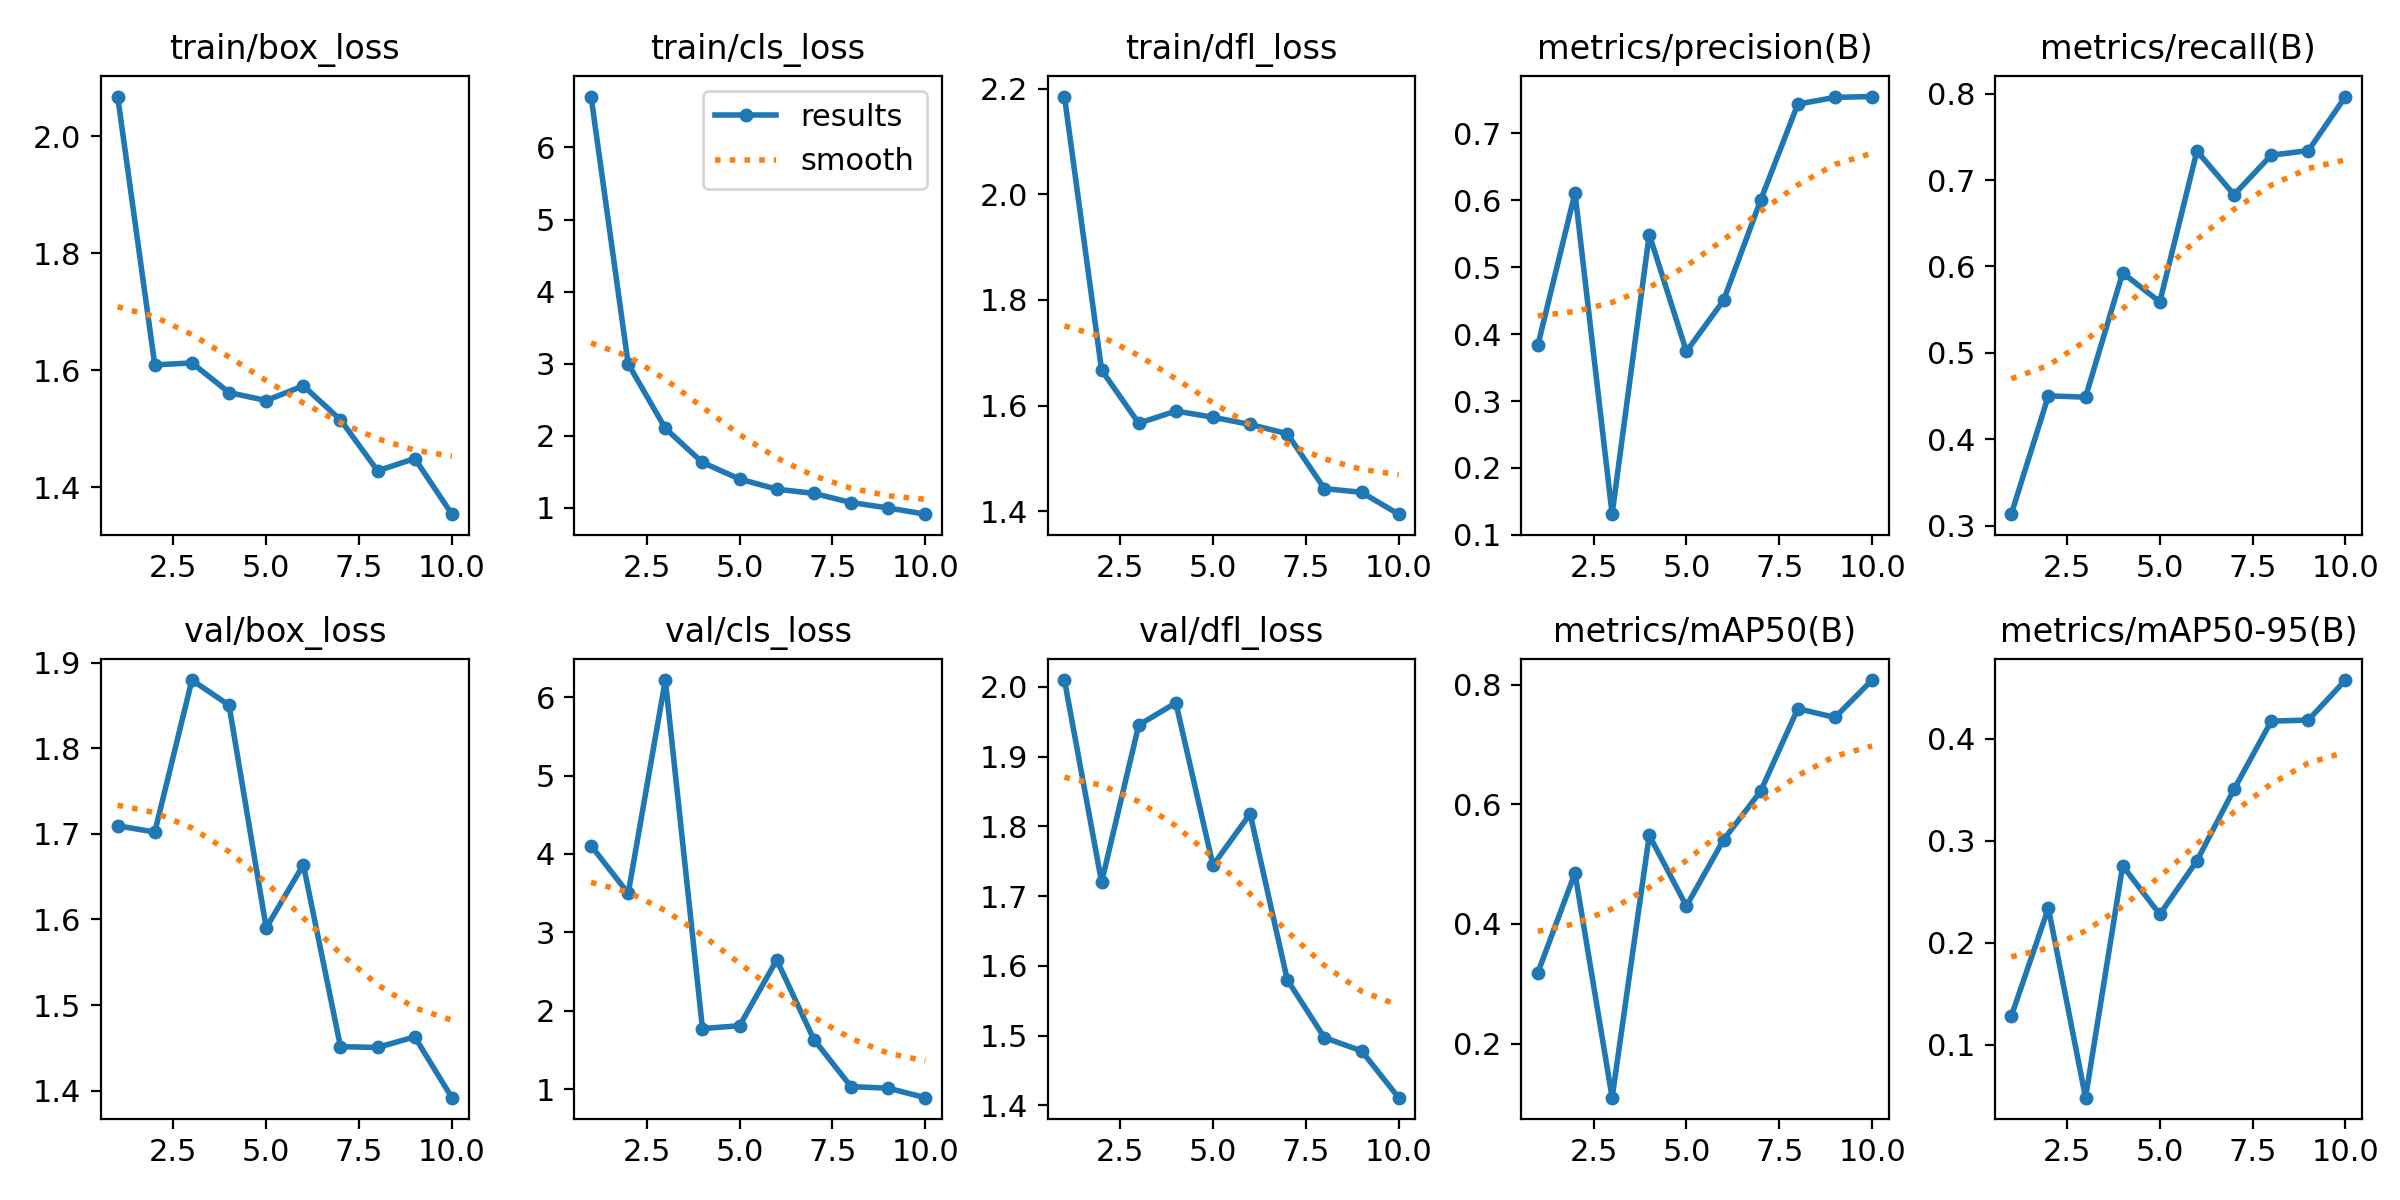

In [18]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/results.png', width=600)

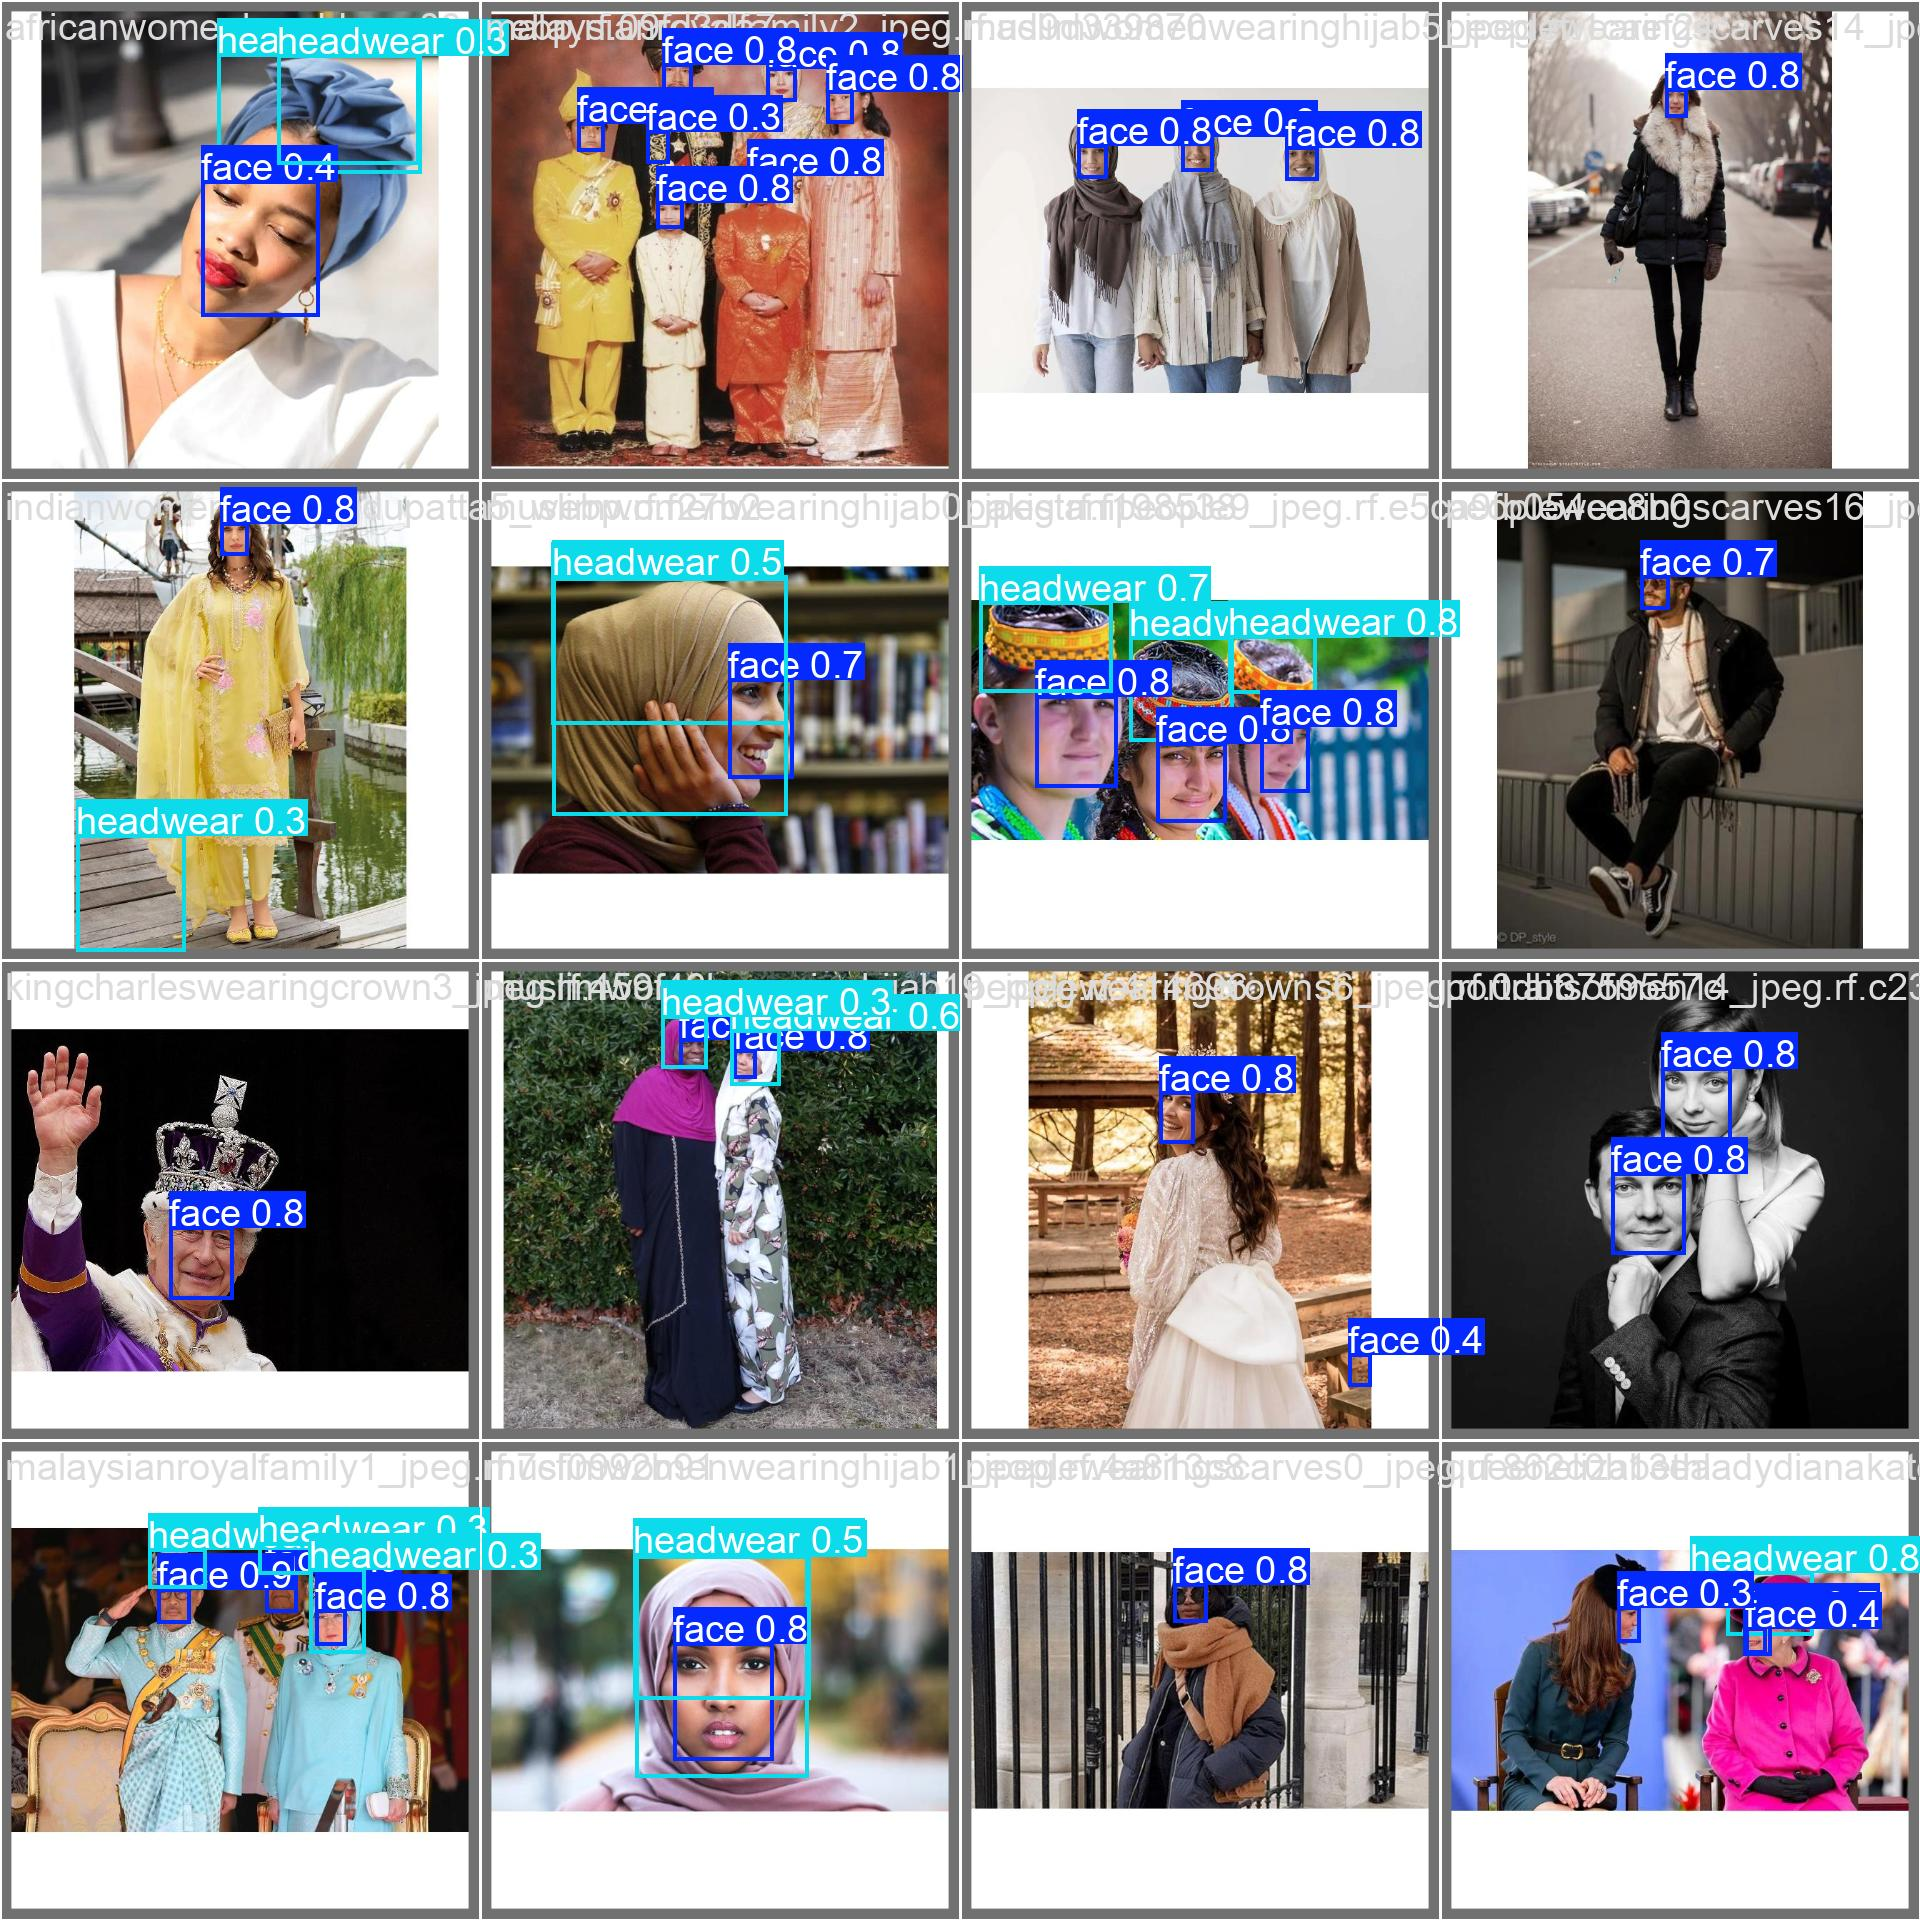

In [19]:
from IPython.display import Image as IPyImage

IPyImage(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Predictions

In [21]:
predictions = model.predict(source=f"{dataset.location}/test/images", save=True)


image 1/33 /content/headwear-detection-2/test/images/arabmenarabwomen84_jpeg.rf.d755016dd135ede285ec40c3c4bafc30.jpg: 640x640 2 faces, 15.7ms
image 2/33 /content/headwear-detection-2/test/images/blackpeople17_webp.rf.619809ebd1ffd3a940ec8659db22bff0.jpg: 640x640 1 face, 1 headwear, 18.0ms
image 3/33 /content/headwear-detection-2/test/images/blackpeople2_jpeg.rf.599615f805d98528426530331c422f6d.jpg: 640x640 1 face, 15.7ms
image 4/33 /content/headwear-detection-2/test/images/blackpeople8_png.rf.cfbb1edbb31ec5bb456e63fd5ff63fb4.jpg: 640x640 1 face, 15.7ms
image 5/33 /content/headwear-detection-2/test/images/blackwomen16_jpeg.rf.47c56000ae668f9a0d7cd867452d48a7.jpg: 640x640 1 face, 15.7ms
image 6/33 /content/headwear-detection-2/test/images/blackwomenwearinghat57_jpeg.rf.b7b1becd62d29aff53d486603961f192.jpg: 640x640 6 faces, 6 headwears, 14.1ms
image 7/33 /content/headwear-detection-2/test/images/blackwomenwearinghat74_jpeg.rf.8832a84f9956528b49850176dc1c97a8.jpg: 640x640 1 face, 1 headwe

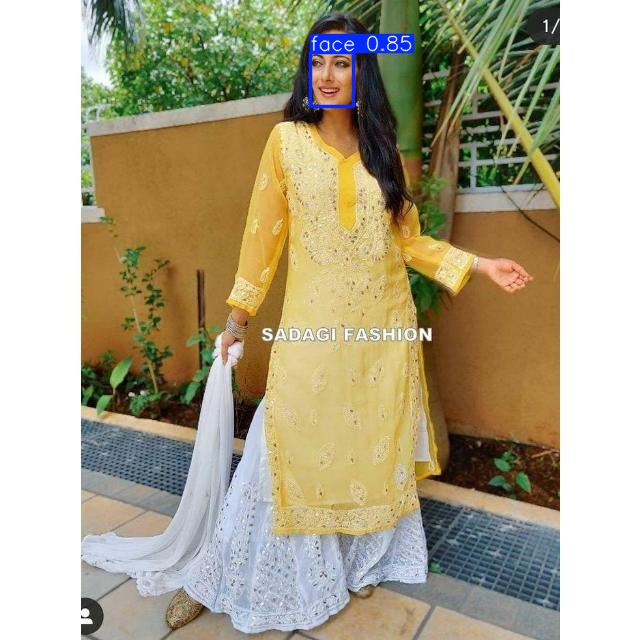

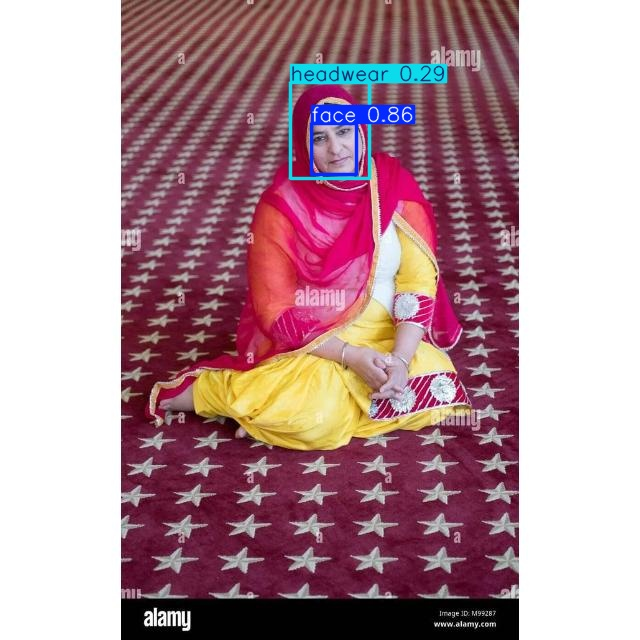

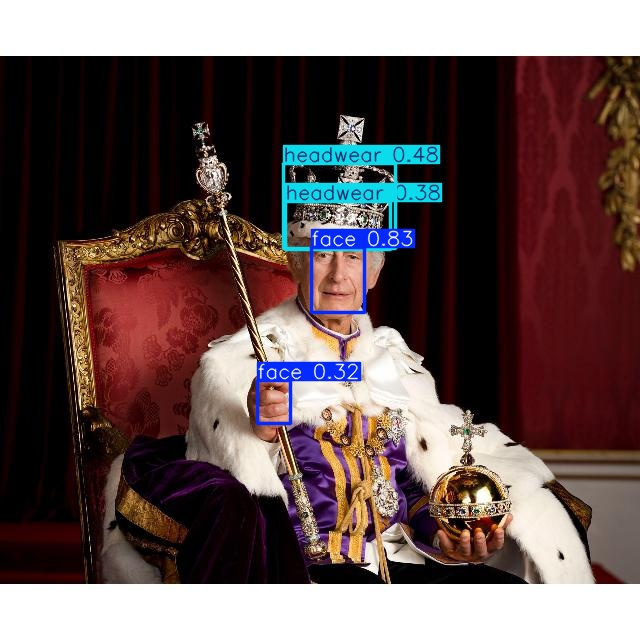

In [22]:
import glob
import os
from IPython.display import Image as IPyImage, display

# It is by default saving predictions to a train folder
latest_folder = max(glob.glob(f'{HOME}/runs/detect/train*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[:3]:
    display(IPyImage(filename=img, width=600))
    print("\n")

## Challenges
* **Dataset**: The biggest challenge I faced for this project was collecting the dataset. I decided to scrape images from Google which I later found was not a good choice because Google keeps changing their DOM to discourage scraping. So I ended up spending a lot of time fixing a scraper I found on github. [Here's](https://github.com/hifsakazmi/Google-Image-Scraper) my version of scraper, if anyone's interested.
* **Annotation**: Second most time consuming task after image scraping was manually annotating 330 images on Roboflow. But Roboflow itself was pretty straightforward to use. It made resizing and splitting data in train/val/test sets a breeze.
* **Model**: I tried three variants of YOLOv11 for this project: small, medium and large each for 10 epochs. Out of these three, large variant performed the worst.   

## Final Thoughts
* My inspiration for this project was a Kaggle dataset for detecting hard hats worn on construction sites. It made me wonder if non-western headwear like hijab, duppatta, keffiyeh can be detected by an object detection model. This project can be further extended by specifically defining these headwear classes and adding more images for each class to the dataset.
* Here I only tried YOLOv11 for training. It would be interesting to see how other models like YOLOv8 and YOLOv10 will perform on this dataset.